In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import time
from numpy import linalg as la

# Génération du dataset

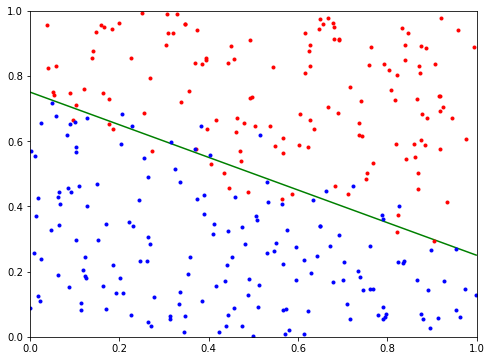

In [2]:
#Question 1

def distance (x1, x2):
    a = -0.5
    b = 0.75
    if a*x1 + b>x2:
        return abs(a*x1-x2+b)/np.sqrt(a**2+1)
    else :
        return -(abs(a*x1-x2+b)/np.sqrt(a**2+1))
    

n_samples = 300 
sigma = 0.05
X1 = np.random.uniform(low=0.0, high=1.0, size=(1,n_samples))[0]
X2 = np.random.uniform(low=0.0, high=1.0, size=(1,n_samples))[0]
distances = np.zeros(len(X1))
for i in range (len(X1)):
    distances[i]=distance (X1[i], X2[i])
classe = (distances>0)*1
X1_0 = []
X2_0 = []
X1_1 = []
X2_1 = []
for i in range (len(X1)):
    r = np.exp(-distances[i]**2/(2*sigma**2))
    if np.random.binomial(1, r/2, size=None) == 1:
        if classe[i]==0:
            classe[i]=1
        else :
            classe[i]=0
    if classe[i]==0 :  
        X1_0.append(X1[i])
        X2_0.append(X2[i])
    else :
        X1_1.append(X1[i])
        X2_1.append(X2[i])
x1 = np.arange(0, 1, 0.001)
x2 =-0.5*x1 + 0.75
plt.figure(figsize=(8,6))
plt.plot(x1,x2, 'g-')
plt.plot(X1_0, X2_0, 'r.')
plt.plot(X1_1, X2_1, 'b.')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

# Descente de gradient (eta = 0,02)

In [3]:
#Question 2

X_plus = np.array([X1, X2, np.ones(len(X1))])

#Question 3 and 4
def sgm(x):
    return (1/(1+np.exp(-x)))

def batch(eps_conv, Nitermax, eta):
    w = np.ones((X_plus.shape[0],))
    w_old = w 
    Niter = 0
    g = 10
    theta = [list(w)]
    while ( (la.norm(g)>eps_conv) and (Niter<Nitermax) ):    
        Niter = Niter+1
        w_old = w 
        pred = sgm(X_plus.T.dot(w))
        err = pred - classe
        g = X_plus.dot(err)
        w = w - eta*g
        theta.append(list(w))

    theta = np.array(theta)
    return (w, theta, Niter)

4660 itérations


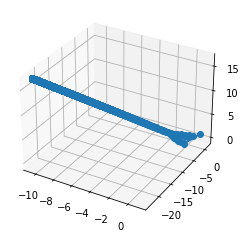

In [4]:
eps = 10e-3
Nitermax = 10e5
eta = 0.02
batch1 = batch(eps, Nitermax, eta)
w = batch1[0]
theta = batch1[1]
Niter = batch1[2]
print(Niter, 'itérations')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(theta[:,0],theta[:,1],theta[:,2],'-o')
plt.draw()

In [5]:
#comparaison de la prédiction avec la classe réelle
y = sgm(X_plus.T.dot(w))
seuil = 0.5
prediction = (y>seuil)*1
Counter(prediction == classe)

Counter({True: 278, False: 22})

In [6]:
#matrice de confusion
data = {'y_Actual': classe ,
        'y_Predicted': prediction
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,126,11
1,11,152


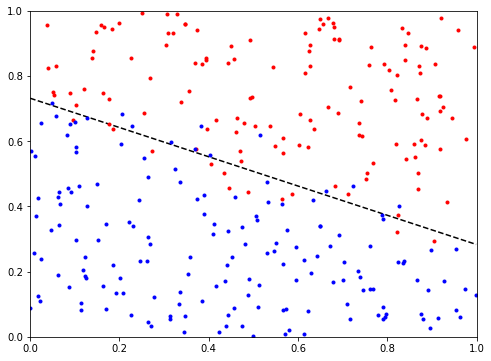

In [7]:
#frontière de décision
x1 = np.arange(0, 1, 0.001)
boundary1 = (-w[2]-w[0]*x1)/w[1]
plt.figure(figsize=(8,6))
plt.plot(x1,boundary1, 'k--')
plt.plot(X1_0, X2_0, 'r.')
plt.plot(X1_1, X2_1, 'b.')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

# Descente de gradient (eta = 0,1)

377 itérations


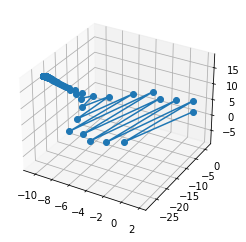

In [8]:
eps = 10e-3
Nitermax = 10e5
eta = 0.1
batch1 = batch(eps, Nitermax, eta)
w = batch1[0]
theta1 = batch1[1]
Niter = batch1[2]
print(Niter, 'itérations')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(theta1[:,0],theta1[:,1],theta1[:,2],'-o')
plt.draw()

In [9]:
y = sgm(X_plus.T.dot(w))
seuil = 0.5
prediction = (y>seuil)*1
Counter(prediction == classe)

Counter({True: 278, False: 22})

In [10]:
data = {'y_Actual': classe ,
        'y_Predicted': prediction
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,126,11
1,11,152


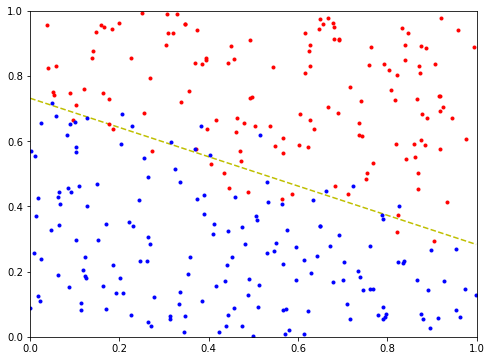

In [11]:
x1 = np.arange(0, 1, 0.001)
boundary2 = (-w[2]-w[0]*x1)/w[1]
plt.figure(figsize=(8,6))
plt.plot(x1,boundary2, 'y--')
plt.plot(X1_0, X2_0, 'r.')
plt.plot(X1_1, X2_1, 'b.')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

En augmentant le taux d'apprentissage, nous remarquons que la descente de gradient converge plus rapidement. En effet, le nombre d'itérations est moindre. Toutefois, les erreurs de prédiction sont similaires.

# Gradient stochastique (eta = 1,5)

In [12]:
#Question 5 and 6

def batch_sto(eps_conv, Nitermax, eta):
    w = np.ones((X_plus.shape[0],))
    Niter = 0
    nepochs = 0
    g = 10
    theta = [list(w)]
    while ( (la.norm(g)>eps_conv) and (Niter<Nitermax) ):
        Niter+=1
        X_plus_target_T = np.append(X_plus,[classe],axis= 0).T
        np.random.shuffle(X_plus_target_T)
        X_plus_perm = X_plus_target_T.T[:3,:]
        classe_perm = X_plus_target_T.T[3,:]
        for i in range (len(classe_perm)):
            nepochs+=1
            pred = sgm(X_plus_perm[:,i].T.dot(w))
            err = pred - classe_perm[i]
            g = X_plus_perm[:,i]*err
            w = w - eta*g
            theta.append(list(w))

    theta = np.array(theta)
    return (w, theta, Niter, nepochs)

7 itérations
2100 epochs


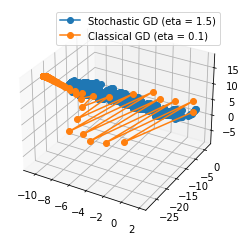

In [13]:
eps = 10e-3
Nitermax = 10e5
eta = 1.5
batch_sto1 = batch_sto(eps, Nitermax, eta)
w = batch_sto1[0]
theta = batch_sto1[1]
Niter = batch_sto1[2]
Nepochs = batch_sto1[3]
print(Niter, 'itérations')
print(Nepochs, 'epochs')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(theta[:,0],theta[:,1],theta[:,2],'-o', label = 'Stochastic GD (eta = 1.5)')
ax.plot(theta1[:,0],theta1[:,1],theta1[:,2],'-o', label = 'Classical GD (eta = 0.1)')
plt.legend()
plt.draw()

In [14]:
print ('Vecteur obtenu avec la descente de gradient stochastique :', theta1[len(theta1)-1,:])
print ('Vecteur obtenu avec la descente de gradient classique :', theta[len(theta)-1,:])

Vecteur obtenu avec la descente de gradient stochastique : [-10.52342917 -23.46371189  17.16046408]
Vecteur obtenu avec la descente de gradient classique : [ -8.84810847 -18.6599082   13.36772379]


Les deux implémentations de la descente de gradient convergent vers un vecteur theta différent. Néanmoins, les deux vecteurs obtenus sont colinéaires.

In [15]:
y = sgm(X_plus.T.dot(w))
seuil = 0.5
prediction = (y>seuil)*1
Counter(prediction == classe)

Counter({True: 276, False: 24})

In [16]:
data = {'y_Actual': classe ,
        'y_Predicted': prediction
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,130,7
1,17,146


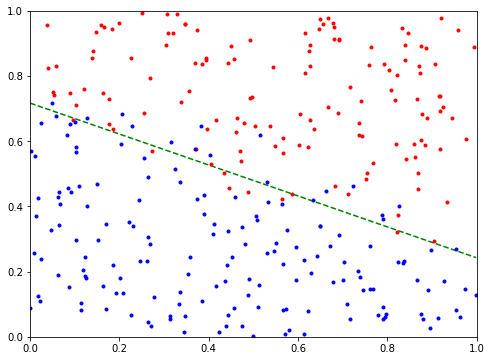

In [17]:
x1 = np.arange(0, 1, 0.001)
boundary_sto = (-w[2]-w[0]*x1)/w[1]
plt.figure(figsize=(8,6))
plt.plot(x1,boundary_sto, 'g--')
plt.plot(X1_0, X2_0, 'r.')
plt.plot(X1_1, X2_1, 'b.')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

Avec le gradient stochastique, le nombre d'itérations (passages dans la boucle while) est très faible. Le nombre d'epochs est du même ordre de grandeur que le nombre d'itérations pour la descente de gradient classique.

# Mini-batch (eta = 1,5)

In [18]:
#Question 8

def mini_batch(eps_conv, Nitermax, eta):
    w = np.ones((X_plus.shape[0],))
    Niter = 0
    nepochs = 0
    g = 10
    theta = [list(w)]
    while ( (la.norm(g)>eps_conv) and (Niter<Nitermax) ):
        Niter+=1
        X_plus_target_T = np.append(X_plus,[classe],axis= 0).T
        np.random.shuffle(X_plus_target_T)
        X_plus_perm = X_plus_target_T.T[:3,:]
        classe_perm = X_plus_target_T.T[3,:]
        for i in range (len(classe_perm)//10):
            nepochs+=1
            pred = sgm(X_plus_perm[:,i*10:(i+1)*10].T.dot(w))
            err = pred - classe_perm[i*10:(i+1)*10]
            g = X_plus_perm[:,i*10:(i+1)*10].dot(err)
            w = w - eta*g
            theta.append(list(w))

    theta = np.array(theta)
    return (w, theta, Niter, nepochs)

22 itérations
660 epochs


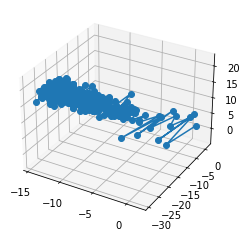

In [19]:
eps = 10e-3
Nitermax = 10e5
eta = 1.5
mini_batch1 = mini_batch(eps, Nitermax, eta)
w = mini_batch1[0]
theta = mini_batch1[1]
Niter = mini_batch1[2]
Nepochs = mini_batch1[3]
print(Niter, 'itérations')
print(Nepochs, 'epochs')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(theta[:,0],theta[:,1],theta[:,2],'-o')
plt.draw()

In [20]:
y = sgm(X_plus.T.dot(w))
seuil = 0.5
prediction = (y>seuil)*1
Counter(prediction == classe)

Counter({True: 277, False: 23})

In [21]:
data = {'y_Actual': classe ,
        'y_Predicted': prediction
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,116,21
1,2,161


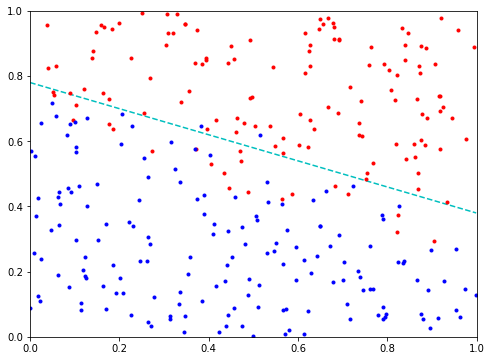

In [22]:
x1 = np.arange(0, 1, 0.001)
boundary_mini_batch = (-w[2]-w[0]*x1)/w[1]
plt.figure(figsize=(8,6))
plt.plot(x1,boundary_mini_batch, 'c--')
plt.plot(X1_0, X2_0, 'r.')
plt.plot(X1_1, X2_1, 'b.')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

# Frontières de décision pour chaque méthode

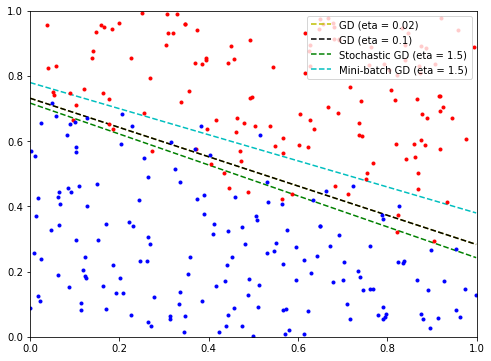

In [23]:
#Question 7

x1 = np.arange(0, 1, 0.001)
plt.figure(figsize=(8,6))
plt.plot(x1,boundary1, 'y--', label = 'GD (eta = 0.02)')
plt.plot(x1,boundary2, 'k--', label = 'GD (eta = 0.1)' )
plt.plot(x1,boundary_sto, 'g--', label = 'Stochastic GD (eta = 1.5)')
plt.plot(x1,boundary_mini_batch, 'c--', label = 'Mini-batch GD (eta = 1.5)')
plt.plot(X1_0, X2_0, 'r.')
plt.plot(X1_1, X2_1, 'b.')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc = 'upper right')
plt.show()

Les différentes méthodes de descente de gradient (classique, stochastique et mini-batch) proposent des frontières de décisions différentes mais qui restent cohérentes.